# Import the original embeddings (with BERT)

In [1]:
test = True

In [37]:
# Step 1: Import libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Step 2: Load my embeddings that are already done
if test == True:
   	url_songs = 'https://drive.google.com/file/d/1OYu-bt9GQQ_q1SJ1295w4RmzH-nXAcs7/view?usp=sharing'
else:
    url_songs = 'url de todo junto'
path_songs = 'https://drive.google.com/uc?export=download&id='+url_songs.split('/')[-2]
song_embeddings_v1 = pd.read_csv(path_songs)

url_events = 'https://drive.google.com/file/d/1qYjdla35SWFpPFBi24uIJXzErMIGWQUi/view?usp=sharing'
path_events = 'https://drive.google.com/uc?export=download&id='+url_events.split('/')[-2]
event_embeddings_v1 = pd.read_csv(path_events)

In [38]:
song_embeddings_v1

,song_id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q375,Q376,Q377,Q378,Q379,Q380,Q381,Q382,Q383,Q384
0,68827,-0.072764,-0.092227,0.059105,-0.044525,-0.078067,0.057185,0.102446,-0.054466,0.041038,...,0.094456,0.019420,0.038416,0.129572,-0.007244,0.014351,-0.045571,0.024775,-0.001791,-0.056692
1,8701,-0.022959,-0.035205,0.005774,0.031458,-0.129949,0.053441,0.062939,-0.072495,-0.044745,...,0.004272,0.056055,-0.003939,0.030060,0.058672,0.038071,0.043437,0.100945,-0.010686,0.023440
2,312626,-0.038232,-0.080630,0.056409,0.018852,-0.040941,0.034921,0.071960,-0.057157,0.031613,...,0.044084,-0.002991,-0.015138,0.079878,-0.064258,0.008049,0.065969,-0.005979,-0.056681,0.026371
3,71018,-0.035632,0.012839,0.091290,0.032101,-0.016424,0.025027,0.129050,-0.084364,0.000768,...,0.027083,0.015963,-0.019816,0.112282,0.006335,0.010327,0.000500,0.021670,0.001438,-0.007999
4,275790,-0.043728,-0.082700,0.024974,-0.033673,-0.092260,0.033969,0.126569,-0.001980,0.020207,...,0.073900,0.017557,0.031168,0.064367,0.020616,-0.003004,0.076213,0.000033,-0.004350,-0.066491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16162,-0.027164,-0.018516,-0.003612,-0.102720,-0.048818,0.060202,0.085997,-0.034680,-0.066928,...,0.061332,0.047787,-0.050173,0.119184,0.009808,-0.020713,0.019839,-0.027181,-0.026856,-0.027917
996,368956,0.053210,-0.124353,0.007004,-0.017552,-0.015337,0.047181,0.059810,-0.030806,0.014303,...,0.036863,0.077593,-0.138552,0.019361,0.010287,-0.034857,0.029118,0.009545,0.042541,-0.016977
997,242018,-0.048709,-0.085922,-0.006966,-0.044076,-0.094757,-0.046681,0.094926,-0.057665,0.038677,...,0.026466,-0.010882,0.047097,0.133255,-0.042655,-0.026356,0.091549,0.034597,0.014053,-0.032622
998,404009,-0.010833,-0.073218,0.072860,-0.038987,-0.077815,0.079919,0.117812,-0.069081,0.016329,...,0.099646,0.075814,0.001709,0.038180,-0.034348,-0.036906,-0.021339,0.034228,0.032466,-0.052820


# Bringing back the complete dataset of 435k songs *(songs_clean_text)*

From the "song_embeddings", we need to recover the song_ids. There was a conflictive line in the original df, so we delete it.

In [4]:
# Lee el archivo línea por línea, omitiendo la fila 15450 (índice 15449)
clean_lines = []
with open("/content/songs_clean_text.csv", "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        if i != 15449:  # ¡Recuerda que los índices empiezan en 0!
            clean_lines.append(line)

# Guarda un nuevo archivo limpio
with open("/content/songs_clean_text_cleaned.csv", "w", encoding="utf-8") as f:
    f.writelines(clean_lines)

# Ahora sí lo puedes leer normalmente
import pandas as pd
songs_clean_text_df = pd.read_csv("/content/songs_clean_text_cleaned.csv")

Corroborating that we removed the conflictive line:

In [5]:
print(len(clean_lines))  # debería ser total original - 1

435855


In [6]:
songs_clean_text_df.shape[0]

435854

# Recover the song_ids of the 1000 sampled songs

Now we need to recover the song_ids from the song_embeddings data frame, to get the exact sample sample from the complete df (songs_clean_text_df), test the new model and compare the cosine similarities.

In [7]:
# Extrae la lista de song_id únicos del sample
sample_ids = song_embeddings_v1["song_id"].unique()

# Filtra el dataframe original usando esos IDs
sampled_lyrics_df = songs_clean_text_df[songs_clean_text_df["song_id"].isin(sample_ids)].copy()

# Verifica el resultado
print(sampled_lyrics_df.shape)
sampled_lyrics_df.head()

(1000, 46)


,song_id,Artists,song,text,Length,emotion,Genre,Album,Release_Date,Key,...,Similarity_Score_2,Similar_Artist_3,Similar_Song_3,Similarity_Score_3,year,month,day,decade,language,clean_text
18,18,Public Enemy,Meet the G That Killed Me,[Sample – Frances Cress Welsing] Every black p...,44,anger,"rap,hip-hop,hip hop",Fear Of A Black Planet,1990-04-10,B Maj,...,0.946477,Tobe Nwigwe,MURDER.,0.941956,1990,4,10,1990,en,every black person say leader need pen blazing...
22,22,Public Enemy,Reggie Jax,"[Intro] Soul to soul, so... [Verse] I never t...",95,joy,"rap,hip-hop,hip hop",Fear Of A Black Planet,1990-04-10,F# min,...,0.944530,Oliver Francis,Sonic,0.944465,1990,4,10,1990,en,soul soul never tried pretend accent never sta...
167,169,Colin Buchanan,Practice Being Godly,[Verse 1] Have you seen those fit and healthy ...,134,joy,hip hop,"Colin's Favourites, Vol. 1",2007-04-10,C Maj,...,0.972333,Ameritz Tribute Standards,Its Midnight Cinderella,0.972299,2007,4,10,2000,en,seen fit healthy guy always doin exercise well...
1847,1910,"Chantel Jeffries,BlocBoy JB,Vory",Better,"[Chorus: Vory] I know he did you wrong, I can ...",193,anger,hip hop,Better ft. BlocBoy JB & Vory,2018-08-10,F min,...,0.983073,"Casper TNG,R K",Running Man,0.978072,2018,8,10,2010,en,know wrong better tryna act like dirt know wro...
2426,2515,Jon Bellion,Ungrateful Eyes,[Verse 1] I made a hundred grand this year (Cl...,204,fear,"pop,hip hop",The Separation,2013-12-10,F Maj,...,0.989268,Upchurch,This That,0.987872,2013,12,10,2010,en,made hundred grand year clap clap clap clap st...


Comparing that the filtering worked:

In [11]:
sampled_lyrics_df.loc[sampled_lyrics_df['song_id'] == 8701,:]

,song_id,Artists,song,text,Length,emotion,Genre,Album,Release_Date,Key,...,Similarity_Score_2,Similar_Artist_3,Similar_Song_3,Similarity_Score_3,year,month,day,decade,language,clean_text
8385,8701,Fats Waller,Hold Tight Want Some Seafood Mama,"I want some seafood, Mama I want some seafood,...",124,joy,jazz,The Essential Fats Waller,2014-03-10,G min,...,0.965567,The Last Poets,Just Because,0.958823,2014,3,10,2010,en,want seafood mama want seafood mama broadway b...


# Applying the new model

Now we will only remove from the lyrics text like [Intro], [Verse], etc, but we will leave stopwords, punctuation signs and not lemmatize, because the model that we'll use works better considering these terms.

In [12]:
import re

def clean_text_tags_only(text):
    # Elimina contenido entre corchetes como [Intro], [Verse 1], etc.
    return re.sub(r'\[.*?\]', '', text)

In [13]:
sampled_lyrics_df["text_clean"] = sampled_lyrics_df["text"].apply(clean_text_tags_only)

In [15]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")

!!! Change the name later, because "embeddings" is confusing. It should be "sample_songs_embeddings".

In [18]:
# Extract the cleaned lyrics
texts = sampled_lyrics_df["text_clean"].tolist()

# Encode in batches with progress bar
embeddings = model.encode(
    texts,
    convert_to_numpy=True,
    batch_size=16,
    show_progress_bar=True
)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Convert "embeddings" (that is an array) into a pandas df:

In [21]:
import pandas as pd

# Create column names for each dimension
embedding_cols = [f"Q{i+1}" for i in range(embeddings.shape[1])]

# Convert the NumPy array to DataFrame
embedding_df = pd.DataFrame(embeddings, columns=embedding_cols)

# Add song_id column from the original sample
embedding_df["song_id"] = sampled_lyrics_df["song_id"].values

# Reorder columns to put song_id first
embedding_df = embedding_df[["song_id"] + embedding_cols]

In [22]:
embedding_df

,song_id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q759,Q760,Q761,Q762,Q763,Q764,Q765,Q766,Q767,Q768
0,18,0.026393,0.048388,0.029478,0.029162,-0.005004,0.008355,0.008548,0.000262,0.017113,...,-0.000941,0.045620,-0.032191,-0.059095,-0.006718,0.009274,-0.035409,-0.008962,-0.038159,-0.017041
1,22,0.015721,0.073754,0.027349,-0.007620,0.024439,0.056366,-0.041101,-0.041397,-0.045186,...,-0.042171,0.021548,-0.000559,0.015615,-0.027780,-0.011842,-0.020716,0.000934,-0.077569,0.024488
2,169,0.019445,0.080559,0.025177,0.027735,0.069341,0.059757,-0.080899,-0.014931,-0.031821,...,0.029220,0.033563,0.029938,0.008559,0.020342,0.016618,-0.025619,-0.025766,-0.002231,-0.037045
3,1910,0.060306,0.068576,0.010730,-0.001038,-0.014967,0.018008,0.000636,-0.007313,-0.062480,...,-0.055427,0.041983,-0.006124,-0.021871,0.011009,0.025471,-0.036439,0.013730,-0.049457,0.011369
4,2515,0.003263,0.122713,0.008659,0.011209,0.011945,-0.014863,-0.019244,0.007885,-0.008221,...,0.008577,-0.032737,-0.043142,0.008043,-0.032312,-0.054398,-0.017304,0.000926,-0.003956,0.004190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,447078,0.009789,0.049349,0.008501,-0.001577,-0.032563,0.047131,-0.044295,-0.037985,-0.060928,...,-0.015255,0.014746,0.044202,0.007112,-0.020095,0.065995,-0.054259,-0.005113,-0.042707,-0.010383
996,447801,0.073727,0.024672,0.008074,0.054773,-0.008611,0.043634,-0.105139,0.006878,-0.008057,...,-0.096010,-0.005684,0.017982,0.018019,-0.023907,-0.000630,-0.003303,-0.015955,0.042044,-0.050819
997,448274,0.062759,0.007302,0.009061,-0.004628,-0.012734,0.013994,-0.018047,-0.013806,-0.009513,...,-0.008453,0.029996,0.029687,0.038063,-0.040655,0.001496,-0.027449,0.049248,-0.098564,-0.028897
998,448684,0.038100,0.091545,-0.030021,-0.029115,0.016747,0.009681,0.009158,-0.002257,-0.010663,...,0.008362,-0.034180,-0.034291,0.018196,-0.053446,0.025275,-0.010589,0.034826,0.009344,-0.001087


Now we need to apply the embeddings also to the events, because they need to have the same dimensions to apply cosine similarity.

In [23]:
event_dict = {
    1413:   'Demonstrate for rights',
    1414:   'Demonstrate for change in institutions, regime',
    1431:   'Conduct strike or boycott for leadership change',
    1432:   'Conduct strike or boycott for policy change',
    1433:   'Conduct strike or boycott for rights',
    1434:   'Conduct strike or boycott for change in institutions, regime',
    1451:   'Engage in violent protest for leadership change',
    1452:   'Engage in violent protest for policy change',
    1453:   'Engage in violent protest for rights',
    1454:   'Engage in violent protest for change in institutions, regime',
    161:    'Reduce or break diplomatic relations',
    163:    'Impose embargo, boycott, or sanctions',
    174:    'Expel or deport individuals',
    175:    'Use tactics of violent repression',
    176:    'Attack cybernetically',
    190:    'Use conventional military force, not specified below',
    191:    'Impose blockade, restrict movement',
    192:    'Occupy territory',
    193:    'Fight with small arms and light weapons',
    194:    'Fight with artillery and tanks',
    196:    'Violate ceasefire',
    200:    'Use unconventional mass violence, not specified below',
    201:    'Engage in mass expulsion',
    202:    'Engage in mass killings',
    203:    'Engage in ethnic cleansing',
    2041:   'Use chemical, biological, or radiological weapons',
    2042:   'Detonate nuclear weapons',
}

In [24]:
event_series = pd.Series(event_dict)
event_df = event_series.reset_index()
event_df.columns = ['EventCode', 'Description']
event_df

,EventCode,Description
0,1413,Demonstrate for rights
1,1414,"Demonstrate for change in institutions, regime"
2,1431,Conduct strike or boycott for leadership change
3,1432,Conduct strike or boycott for policy change
4,1433,Conduct strike or boycott for rights
5,1434,Conduct strike or boycott for change in instit...
6,1451,Engage in violent protest for leadership change
7,1452,Engage in violent protest for policy change
8,1453,Engage in violent protest for rights
9,1454,Engage in violent protest for change in instit...


In [33]:
# Get the list of event descriptions
event_texts = event_df["Description"].tolist()

# Encode using the same MPNet model
event_embeddings_v2 = model.encode(
    event_texts,
    convert_to_numpy=True,
    batch_size=8,
    show_progress_bar=True
)

# Convert to DataFrame with Q1...Q768
embedding_cols = [f"Q{i+1}" for i in range(event_embeddings_v2.shape[1])]
event_embeddings_v2_df = pd.DataFrame(event_embeddings_v2, columns=embedding_cols)

# Add EventCode back
event_embeddings_v2_df["EventCode"] = event_df["EventCode"].values

# Reorder columns to have EventCode first
event_embeddings_v2_df = event_embeddings_v2_df[["EventCode"] + embedding_cols]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [85]:
# Guardar como CSV
event_embeddings_v2_df.to_csv("event_embeddings_mpnet.csv", index=False)

# Código para descargarlo en tu máquina
from google.colab import files
files.download("event_embeddings_mpnet.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
event_embeddings_v2_df

,EventCode,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q759,Q760,Q761,Q762,Q763,Q764,Q765,Q766,Q767,Q768
0,1413,-0.038389,0.092729,0.014480,0.021319,-0.017797,0.017494,0.051795,-0.005619,0.042721,...,0.034321,-0.028046,0.011053,-0.012774,0.017926,-0.010820,-0.039081,0.047389,0.004776,0.016195
1,1414,0.040297,0.076205,0.001373,0.022019,-0.019568,-0.007919,-0.013225,0.007786,0.069810,...,-0.010134,-0.004838,0.013977,0.025940,0.016742,-0.009677,-0.048136,0.002388,-0.040475,0.031196
2,1431,0.004238,0.112865,0.017074,0.056330,-0.004346,0.013857,-0.028852,0.016746,0.075906,...,-0.007470,-0.002414,-0.004046,0.021993,-0.010829,-0.023880,-0.010773,0.013614,-0.063428,0.013025
3,1432,-0.024928,0.083619,0.031374,0.004132,-0.012990,-0.002254,0.036292,0.024686,0.061471,...,0.013026,0.030186,-0.010846,-0.016727,-0.019090,0.014532,-0.002495,0.033945,-0.053585,0.015368
4,1433,-0.059694,0.062832,0.038933,0.017514,-0.016481,0.019863,0.069731,-0.010325,0.070944,...,0.033371,-0.003048,0.028513,-0.039480,-0.031930,-0.010207,-0.019394,0.039669,-0.032798,0.024723
5,1434,-0.006004,0.062288,0.038083,0.017936,0.004762,0.000708,0.035507,0.002673,0.111983,...,0.006162,0.004486,0.037681,0.015185,-0.012519,-0.011055,-0.039865,0.026982,-0.047799,0.026124
6,1451,0.036952,0.127987,0.021561,0.049122,0.018072,0.012140,-0.040819,-0.006026,0.055163,...,0.003505,0.002057,-0.027259,0.026859,0.000534,-0.007616,-0.013429,0.004548,-0.046898,0.012694
7,1452,-0.001624,0.112784,0.032414,0.012818,-0.000838,-0.008472,0.012649,0.006708,0.038402,...,0.019190,0.022938,-0.037191,-0.017594,-0.010274,0.028911,-0.008763,0.018930,-0.047506,0.022942
8,1453,-0.015628,0.089192,0.032651,0.005405,-0.000180,0.031549,0.027462,-0.023980,0.038966,...,0.033882,-0.010416,-0.004733,-0.029220,-0.006259,0.021415,-0.014794,0.038890,-0.005475,0.029527
9,1454,0.031420,0.073584,0.032024,0.017002,0.016343,-0.000984,0.011156,-0.017483,0.080824,...,0.008233,0.006037,0.010217,0.007407,0.005551,0.009418,-0.036133,0.018513,-0.035928,0.028300


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

# Prepare the embedding matrices (excluding ID columns)
X_songs = embedding_df.drop(columns="song_id").values
X_events = event_embeddings_v2_df.drop(columns="EventCode").values

# Compute cosine similarity: songs × events
similarity_matrix_v2 = cosine_similarity(X_songs, X_events)

# Optional: wrap in DataFrame for readability
similarity_df_v2 = pd.DataFrame(
    similarity_matrix_v2,
    index=embedding_df["song_id"],
    columns=event_embeddings_v2_df["EventCode"]
)

In [36]:
similarity_df_v2.describe()

EventCode,1413,1414,1431,1432,1433,1434,1451,1452,1453,1454,...,192,193,194,196,200,201,202,203,2041,2042
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.064486,0.036563,0.011958,0.012933,0.011612,-0.004589,0.045697,0.046184,0.039168,0.020138,...,0.050336,0.020935,0.053540,0.111583,0.015672,0.075452,0.026277,0.028173,-0.052466,0.017265
std,0.064931,0.060233,0.055275,0.052003,0.053912,0.056196,0.068557,0.070521,0.070145,0.066905,...,0.061945,0.049393,0.045702,0.062103,0.074765,0.079765,0.077043,0.068228,0.066078,0.064680
min,-0.095661,-0.101609,-0.117116,-0.105269,-0.096445,-0.149937,-0.111796,-0.101837,-0.114248,-0.134101,...,-0.118338,-0.094379,-0.060494,-0.056029,-0.173811,-0.150957,-0.152000,-0.151947,-0.203498,-0.126035
25%,0.019968,-0.002605,-0.025770,-0.022260,-0.024349,-0.041569,-0.002727,-0.004628,-0.009870,-0.025900,...,0.008811,-0.012115,0.024007,0.071969,-0.034915,0.022662,-0.025006,-0.016193,-0.098748,-0.025520
50%,0.053855,0.031194,0.004711,0.007640,0.002595,-0.011628,0.042662,0.039083,0.032667,0.015446,...,0.044158,0.016593,0.047899,0.105517,0.006439,0.073821,0.020540,0.019409,-0.059989,0.010763
75%,0.099158,0.067475,0.041200,0.038975,0.038254,0.022865,0.083777,0.084603,0.074400,0.055118,...,0.085844,0.047670,0.078374,0.145792,0.055942,0.125064,0.072594,0.063306,-0.017898,0.049681
max,0.369874,0.358131,0.283876,0.290532,0.301335,0.329132,0.401619,0.435900,0.408466,0.417677,...,0.337221,0.214058,0.266285,0.439205,0.350443,0.361745,0.330235,0.348615,0.276529,0.500710


# Comparing the new model to the old one

We will recalculate the similarity_df for the previous version (the one with BERT) to compare:

In [42]:
song_embeddings_v1.head(1)

,song_id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q375,Q376,Q377,Q378,Q379,Q380,Q381,Q382,Q383,Q384
0,68827,-0.072764,-0.092227,0.059105,-0.044525,-0.078067,0.057185,0.102446,-0.054466,0.041038,...,0.094456,0.01942,0.038416,0.129572,-0.007244,0.014351,-0.045571,0.024775,-0.001791,-0.056692


In [41]:
event_embeddings_v1.head(1)

,EventCode,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,...,dim_374,dim_375,dim_376,dim_377,dim_378,dim_379,dim_380,dim_381,dim_382,dim_383
0,1413,-0.02164,0.092606,0.000398,-0.010073,-0.01941,0.073137,0.019721,0.018777,-0.044716,...,0.084632,0.086719,0.000282,0.004671,-0.062479,0.066642,0.126728,0.185229,0.001672,0.027591


In [43]:
# Step 3: Make sure that we're only using the vectors (384 numeric columns)
# If there are columns like 'song' or 'event', we eliminate them
song_vectors = song_embeddings_v1.drop(columns=['song_id']).values
event_vectors = event_embeddings_v1.drop(columns=['EventCode']).values

In [45]:
# Step 4: Calculate the cosine similarity matrix
similarity_matrix_v1 = cosine_similarity(song_vectors, event_vectors)

In [46]:
# Step 5: Create df
similarity_df_v1 = pd.DataFrame(similarity_matrix_v1,
                             index=song_embeddings_v1['song_id'],
                             columns=event_embeddings_v1['EventCode'])

In [48]:
similarity_df_v1

EventCode,1413,1414,1431,1432,1433,1434,1451,1452,1453,1454,...,192,193,194,196,200,201,202,203,2041,2042
song_id,,,,,,,,,,,,,,,,,,,,,
68827,0.054829,-0.020995,0.001726,0.034114,0.065783,0.026820,0.026753,0.042236,0.075437,0.034860,...,0.030676,0.091197,-0.003172,-0.043017,0.071874,-0.021605,0.020304,-0.045844,-0.014506,0.105905
8701,0.080045,0.029493,-0.011937,0.036954,0.063092,0.002647,-0.041458,-0.023995,0.007328,-0.042182,...,0.095251,-0.019907,0.085832,-0.022174,0.013251,0.016186,0.053042,-0.019306,-0.058709,-0.002071
312626,0.117203,-0.046293,0.014552,0.015431,0.053146,-0.020668,0.032391,0.020756,0.051618,-0.011077,...,0.069201,0.147861,0.003009,0.028469,0.064534,-0.022065,0.016588,-0.056525,-0.075247,-0.000607
71018,0.080494,-0.016610,-0.073499,-0.077947,-0.039458,-0.097725,0.013961,-0.007130,0.021176,-0.018876,...,0.038949,0.248068,0.051869,0.120699,0.043204,0.024148,0.093358,0.043763,0.043553,0.097837
275790,0.087898,-0.005446,0.092211,0.085383,0.104728,0.073747,0.095739,0.073693,0.109842,0.053039,...,0.099455,0.019448,0.079325,-0.040607,0.096186,0.106808,0.105069,0.036984,-0.050453,0.046317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16162,0.074714,0.052103,0.012606,0.052816,0.037790,0.038123,0.055266,0.076341,0.087244,0.069033,...,0.181375,-0.000403,0.067691,-0.065207,0.172943,0.060199,0.149834,0.032564,-0.030382,0.018443
368956,0.081760,0.109476,0.059404,0.089317,0.072121,0.061929,0.090364,0.114507,0.092720,0.081749,...,0.072546,0.050899,0.011945,-0.023038,0.124905,0.176956,0.190960,-0.021071,-0.044358,0.030026
242018,0.042630,-0.054575,0.021485,0.001748,0.046869,0.013318,0.053382,0.033041,0.085453,0.042184,...,0.041619,-0.001367,0.027813,0.004471,0.015960,0.046430,0.024670,0.044488,-0.020974,0.032894


Compare both matrices:

In [51]:
# Shape sanity check
print(similarity_df_v1.shape)
print(similarity_df_v2.shape)

(1000, 27)
(1000, 27)


In [52]:
print("BERT cosine similarity stats:")
print(similarity_df_v1.values.flatten().min())
print(similarity_df_v1.values.flatten().mean())
print(similarity_df_v1.values.flatten().max())

print("MPNet cosine similarity stats:")
print(similarity_df_v2.values.flatten().min())
print(similarity_df_v2.values.flatten().mean())
print(similarity_df_v2.values.flatten().max())

BERT cosine similarity stats:
-0.18655462836124134
0.0615338923664793
0.41501434126646675
MPNet cosine similarity stats:
-0.20349765
0.028138243
0.50070953


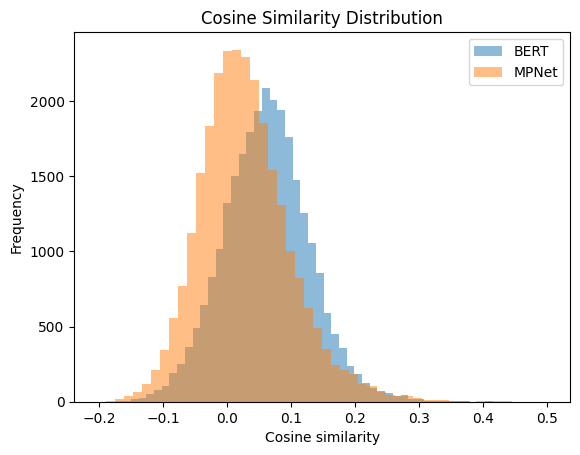

In [53]:
import matplotlib.pyplot as plt

plt.hist(similarity_df_v1.values.flatten(), bins=50, alpha=0.5, label="BERT")
plt.hist(similarity_df_v2.values.flatten(), bins=50, alpha=0.5, label="MPNet")
plt.title("Cosine Similarity Distribution")
plt.xlabel("Cosine similarity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [57]:
# Ensure both series are aligned by index
bert_max = similarity_df_v1.max(axis=1)
mpnet_max = similarity_df_v2.max(axis=1)

# Align both Series before comparison
bert_max_aligned, mpnet_max_aligned = bert_max.align(mpnet_max, join="inner")

# Compare
comparison = mpnet_max_aligned > bert_max_aligned
print("MPNet wins in:", comparison.sum(), "out of", len(comparison), "songs")

MPNet wins in: 274 out of 1000 songs


In [81]:
event_code = 1431  # pick your event of interest

# Top 5 by BERT
top_bert = similarity_df_v1[event_code].sort_values(ascending=False).head(10)
print("Top 10 songs for Event", event_code, "using BERT:")
print(top_bert)

# Top 5 by MPNet
top_mpnet = similarity_df_v2[event_code].sort_values(ascending=False).head(10)
print("\nTop 10 songs for Event", event_code, "using MPNet:")
print(top_mpnet)

Top 5 songs for Event 1431 using BERT:
song_id
193783    0.293792
331265    0.291999
127899    0.270224
148140    0.261884
391885    0.260326
296572    0.254231
327102    0.251922
189252    0.234999
121319    0.232364
417737    0.228686
Name: 1431, dtype: float64

Top 5 songs for Event 1431 using MPNet:
song_id
274095    0.283876
442205    0.274925
391885    0.267953
336663    0.257376
18        0.238537
296572    0.227623
329144    0.207188
222928    0.205723
110470    0.200850
352155    0.200432
Name: 1431, dtype: float32


In [72]:
import pandas as pd

# Configura pandas para mostrar texto largo sin truncar
pd.set_option('display.max_colwidth', None)

In [83]:
songs_clean_text_df.loc[songs_clean_text_df['song_id'].isin([193783,331265,127899,148140,391885,296572,327102,189252,121319,417737]), 'text']

,text
117477,He walked into the room Paid the working man The change was physical It’s happening again It will always be there Those strange happenings He taught You how to see again He’ll always be Your friend Those early years Felt so unclean You tried to walk away But it’s happening again
123869,"They assured me I was guilty but I committed no crime They said confessions bring lenience so they put me on the line So I protest the massacres at the Tiananmen Square My friends said, ""Yo, stay away man, you better not go fuckin' back there"" Wouldn't let me write about my opinions about the state And the freedom of expression they would never tolerate And the military secrets that I never did steal I didn't start no violence, no, there was nobody that I killed, no So I had a clear account of all the abuses of power And the memories of homeland now gone sour And I only got one weapon, it's so plain for me to see My only weapon I call poetry [Chorus] And I don't even know why The truth seems like a lie In my cell there is no sky When I was arrested in Shanghai Now, into wealth and privilege I was not born But a devotion to freedom and liberty I was sworn So every emotion is studied, watched and controlled Who gets paid, who gets disciplined, who gets rolled So transmitter beams my coordinates anywhere on earth And as radio waves surveillance, satellite burst Open up your skull and let some knowledge come in Crack open the cranium and let awareness begin [Chorus] And I don't even know why The truth seems like a lie In my cell there is no sky When I was arrested in Shanghai"
143449,"[Verse 1] Nothing was saving our day There was nothing to say But you said something anyway Claiming I stepped out of line Which forced you to leave me As if that idea was mine [Chorus] Oh, you stupid thing Speaking of course as your dear departed Oh, you stupid thing It wasn't me that you outsmarted Oh, you stupid thing Stopping it all Before it even started [Verse 2] I bet you knew it would come That's just like you to sit back And just play it dumb One word of warning would help But that sacrifice was made Trying to save yourself [Chorus] Oh, you stupid thing Speaking of course as your dear departed Oh, you stupid thing It wasn't me that you outsmarted Oh, you stupid thing Stopping it all Before it even started [Verse 3] Maybe that's just how I am To fall where I stand Or I'm weak for that kind of man One who looks helpless and brave But you turned into a coward I don't care for the parts you saved [Chorus] Oh, you stupid thing Speaking of course as your dear departed Oh, you stupid thing It wasn't me that you outsmarted Oh, you stupid thing..."
183336,"[Chorus: Oliver Tree and Melanie Martinez] Something up ahead Something up ahead to help us Something up ahead Something up ahead, so reckless Not feelin alright Not feelin all cool Need help right now 'Fore I break the rules [Chorus: Oliver Tree and Melanie Martinez] Something up ahead Something up ahead to help us Something up ahead Something up ahead, so reckless Not feelin alright Not feelin all cool Need help right now 'Fore I break the rules [Bridge: Joji] Youth Youth Youth Youth Youth Youth Youth Youth [Outro: Joji] Penis music"
187731,"[Verse 1] They use the flag to control us Brainwash you to be their patriotic slaves Brainwash you by controlling what we learn The only difference from the Nazis is that someone tried to stop them [Chorus] Red, white and brainwashed Red, white and brainwashed Red, white and brainwashed Red, white and brainwashed [Verse 2] The government says they're working for us just as long as we increase their pay But the minute they get into office we're a has-been of yesterday [Chorus] Red, white and brainwashed Red, white and brainwashed Red, white and brainwashed Red, white and brainwashed [Verse 3] The red stands for the blood of all the people we've slain The white for this racist, bigoted foundation The blue for your Aryan eyes -- all empty Empty because you're taugh

In [84]:
songs_clean_text_df.loc[songs_clean_text_df['song_id'].isin([274095,442205,391885,336663,18, 296572,329144,222928,110470,352155]), 'text']

,text
18,"[Sample – Frances Cress Welsing] Every black person who says that they're a leader needs to pen blazing questions about HIV And get an answer to the question ""How could it be in a book published in 1969?"" Under chemical and biological warfare Tell 'em [Verse: Chuck D + Flavor Flav] Man to man, I don't know if they can From what I know, the parts don't fit (Ah shit) How he's sharin' a needle with a drug addict He don't believe he has it (Either) But now he does, he doesn't know 'Cause he goes straight to a ho Tell you what who was next on the butt Wild thingin' on a germ runnin' wild Yo stop! But the bag popped Damn! [Flavor Flav] Yo, Terminator man, yo meet the G that killed me"
106976,"[Chorus] The girl from Tel Aviv who wouldn't kneel The girl from Tel Aviv who wouldn't kneel Not for husband, dictator, tyrant or king [Verse 1] Humble homes with mottoes on the walls Symbols and signs in framed designed Sure to keep the poor poor In fear of a god who hadn't saved them after all [Refrain] And all of my friends are in trouble They're sorry, they're sick, and they know All of my friends are in trouble There's no need to go into that now [Chorus] The girl from Tel Aviv who wouldn't kneel The girl from Tel Aviv who wouldn't kneel Not for husband, dictator, tyrant or king [Verse 2] The sorrow my countenance shows Is hardly worth mentioning now Impartial application of the law In other words, legalized torture [Refrain] And all of my friends are in trouble They're sorry, they're sick, and they know All of my friends are in trouble But there's no need to go into that now [Verse 3] La da da, la da da, la da da Of princes and kings and their costly parade Blitz them all back to the Stone Age The American way displayed proudly Is to show lots of teeth and talk loudly And the land weeps oil, the land weeps oil What do you think all these armies are for? Just because the land weeps oil Oh, oh La da da, la da da, la da da And the land weeps oil, the land weeps oil What do you think all these conflicts are for? It's just because the land weeps oil"
215987,"[Intro] Rise! [Verse 1] You took a part of me I've wasted all this time just giving up The revolution's starting Why don't you try and stop it? We've lost control of our minds You think we're giving in? It's time to prove yourself So let the battle begin [Verse 2] Oh, we're not the same kids you used to know So you wanna play this dangerous game? Well, we're ready to go Yeah, we're ready to fucking go [Pre-Chorus] So at the end of the world Let's let em hear us say [Chorus] “We are, we are, we are The creatures that you've hunted We are, we are, we are The ghosts of hope you've killed Stand up, stand up, stand up We're taking back tomorrow Become, become, become Become the cog and crown” [Verse 3] You think you're done with me? Like you can light the match and not get burned? We are the kids you love to hate The ones that never learned to be part of the system We were born to tear shit inside out So sharpen your teeth Ready your guns The revolution starts now [Bridge] We've already died if we give in to everything they ask So become more tonight We are your bloodline We've already died if we give in to everything they ask So become more tonight We are your bloodline Unleash hell! [Breakdown] This is your bloodline, bloodline We are your, we are your lifeline, lifeline This is your bloodline, bloodline We are your, we are your lifeline, lifeline So let them hear us say [Chorus] ""We are, we are, we are The creatures that you've hunted We are, we are, we are The ghosts of hope you've killed Stand up, stand up, stand up We're taking back tomorrow Become, become, become Become the cog and crown We are, we are, we are The creatures that you've hunted We are, we are, we are The ghosts of hope you've killed Stand up, stand up, stand up We're taking back tomorrow Become, become, become Become the cog and"" [Breakdown] Become the cog and crown"
265481,"Warrior, vagabond, legend, whore M

Songs in both rankings:

In [82]:
songs_clean_text_df.loc[songs_clean_text_df['song_id'].isin([391885,296572]), 'text']

,text
287217,"[Intro] Here is to your false ideals I am so sick of all your protesting signs Your claims disgust me! If you really knew the God you claim to serve, You should know there's no hate in love This your warning, this is your fall Try and justify anything you hold to be true Try and justify anything you hold to be true [Pre-Chorus] We were meant to coexist It was never supposed to be like this! At what cost do you think you'll be saved? [Chorus] Don't use His name to move all the mountains in your way Go back from where you came, have heart with what you say [Post-Chorus] You think you have all of the answers Don’t think you can judge, and not be judged No! [Verse 2] You use His name in vain You're a deceiver Open your ears and bite your tongue Now listen up [Verse 3] Protest the funerals of the ones who protect you? Innocent men and women who have died to defend you Stop biting the hand that, feeds, consumed by all your own needs [Pre-Chorus] At what cost will you be saved? [Chorus] Don't use His name to move all the mountains in your way Go back from where you came, have heart with what you say [Outro] You're a plague to the non-believer Tell them all ""You're gonna burn forever”! You cast your stones in my Father’s name There will be hell to pay May you burn forever There will be hell to pay"
379456,[Sampling : Donald Trump] I have decided to launch A nuclear strike For peace And democracy And democracy I have decided to launch A nuclear strike For peace And democracy And democracy [Ad lib : Rosenfeld] (Ooh) [Sampling : Donald Trump] A nuclear strike A nuclear strike For peace A nuclear strike A nuclear strike A nuclear strike For peace [Bridge : Rosenfeld] I've become obsolete Like the engines I had built Students surpassed teachers Machines murdered makers (Ah) (Ah) (Ah) [Pre-Chorus : Rosenfeld] I'll watch as it tumbles Crumbles and falls What can I do Except going through The mess we made The hell we brought Upon ourselves Open your eyes [Sampling : Donald Trump] I have decided to launch A nuclear strike For peace And democracy And democracy I have decided to launch A nuclear strike For peace And democracy And democracy


# Running MPnet for the 435k songs

In [90]:
from sentence_transformers import SentenceTransformer
import numpy as np
import os
import gc

def embed_in_chunks_safe(df, text_col='text', id_col='song_id',
                         model_name='all-mpnet-base-v2',
                         batch_size=10000, encode_batch_size=64,
                        output_dir='/content/drive/MyDrive/mpnet_batches'):
    """
    Embebe un dataframe grande usando MPNet, en chunks seguros, guardando cada lote en disco.
    Puede reanudarse si se cae Colab.
    """
    os.makedirs(output_dir, exist_ok=True)
    model = SentenceTransformer(model_name)

    total = len(df)
    n_chunks = int(np.ceil(total / batch_size))

    for i in range(n_chunks):
        start = i * batch_size
        end = min((i + 1) * batch_size, total)

        # Archivos de salida
        emb_file = os.path.join(output_dir, f'embeddings_batch_{i+1}.npy')
        id_file = os.path.join(output_dir, f'song_ids_batch_{i+1}.npy')

        # Saltar si ya existen
        if os.path.exists(emb_file) and os.path.exists(id_file):
            print(f"✅ Batch {i+1}/{n_chunks} ya existe. Saltando.")
            continue

        print(f"🔹 Procesando batch {i+1}/{n_chunks} ({start} a {end})")

        chunk = df.iloc[start:end]
        texts = chunk[text_col].tolist()
        ids = chunk[id_col].tolist()

        try:
            embeddings = model.encode(texts, show_progress_bar=True, batch_size=encode_batch_size)

            # Guardar embeddings y song_ids
            np.save(emb_file, embeddings)
            np.save(id_file, np.array(ids))

            print(f"💾 Batch {i+1} guardado.")

        except Exception as e:
            print(f"❌ Error en batch {i+1}: {e}")
            break  # Evita seguir si algo grave pasa

        del embeddings, chunk, texts, ids
        gc.collect()

In [1]:
embed_in_chunks_safe(songs_clean_text_df)

NameError: name 'embed_in_chunks_safe' is not defined

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
import os
output_dir = '/content/drive/MyDrive/mpnet_batches'
os.makedirs(output_dir, exist_ok=True)